data/Vivosight_data/M16_Results [<data_types.BloodFlow object at 0x3001619a0>, <data_types.BloodFlow object at 0x177ebe4e0>, <data_types.BloodFlow object at 0x3003df170>, <data_types.BloodFlow object at 0x3003aaed0>, <data_types.BloodFlow object at 0x3003aa3c0>, <data_types.BloodFlow object at 0x3003aaea0>, <data_types.BloodFlow object at 0x3003aaf30>, <data_types.BloodFlow object at 0x3003aa7e0>, <data_types.BloodFlow object at 0x30013f140>, <data_types.BloodFlow object at 0x30013eab0>, <data_types.BloodFlow object at 0x3003a9dc0>, <data_types.BloodFlow object at 0x300416180>, <data_types.BloodFlow object at 0x3003d2c90>, <data_types.BloodFlow object at 0x3003d3fe0>, <data_types.BloodFlow object at 0x3003d1b50>, <data_types.BloodFlow object at 0x3003d2090>, <data_types.BloodFlow object at 0x3003d1040>, <data_types.BloodFlow object at 0x3003d1d00>, <data_types.BloodFlow object at 0x3003d3740>, <data_types.BloodFlow object at 0x3003d3c80>, <data_types.BloodFlow object at 0x3001166c0>, <

/Users/tim/Desktop/skin_exposure/code/MeS_Vivosight/code/data_types.py:305: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


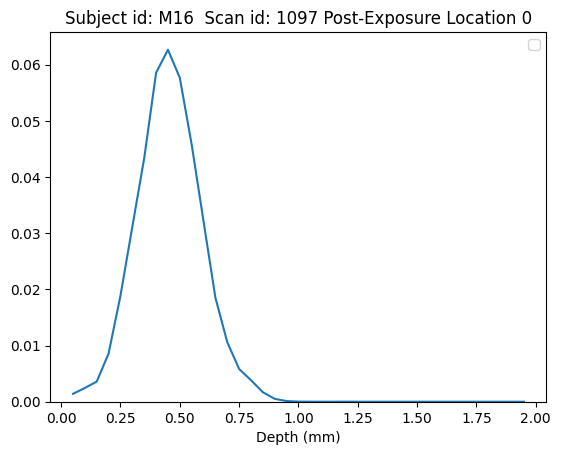

1097 0 False 0.062673 True 0


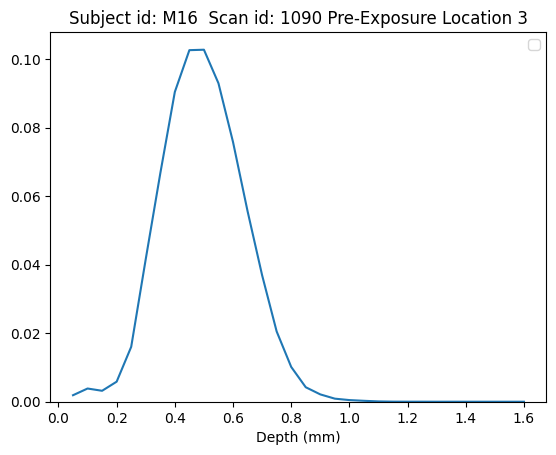

1090 3 False 0.102703 False 3


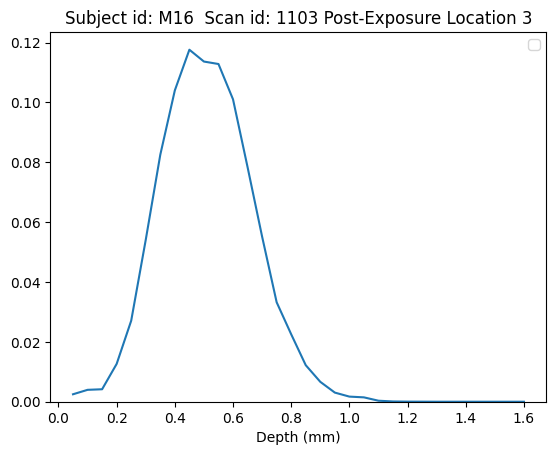

1103 3 False 0.11759 True 3


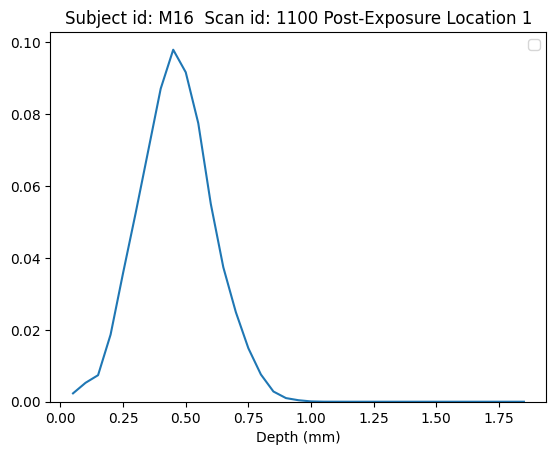

1100 1 False 0.0979076 True 1


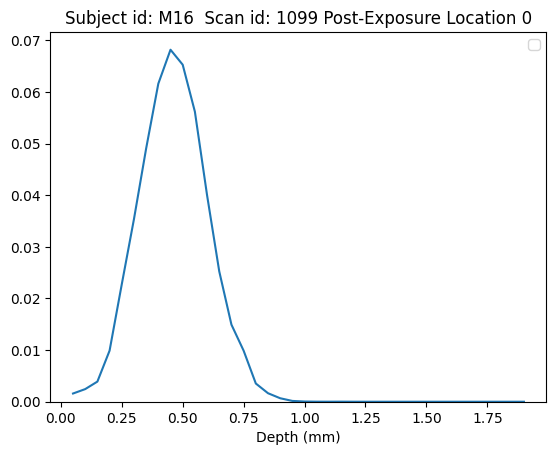

1099 0 False 0.0681848 True 0


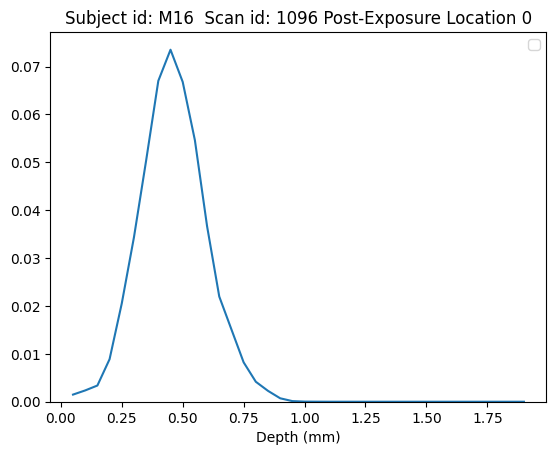

1096 0 False 0.0735267 True 0


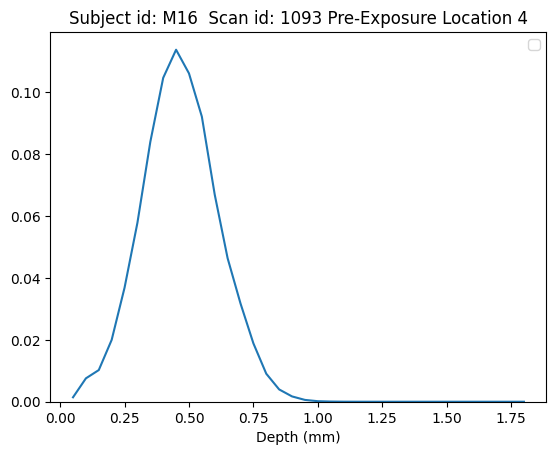

1093 4 False 0.113681 False 4


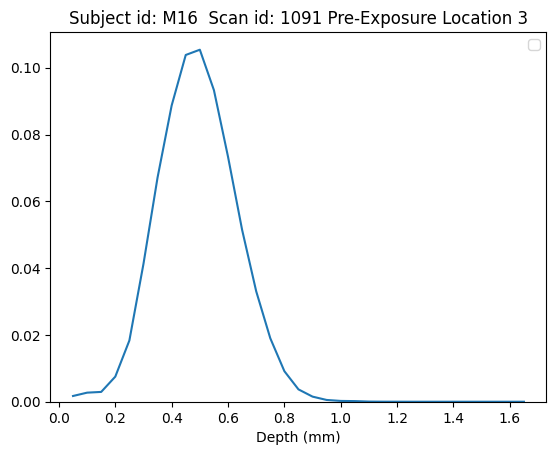

1091 3 False 0.105393 False 3


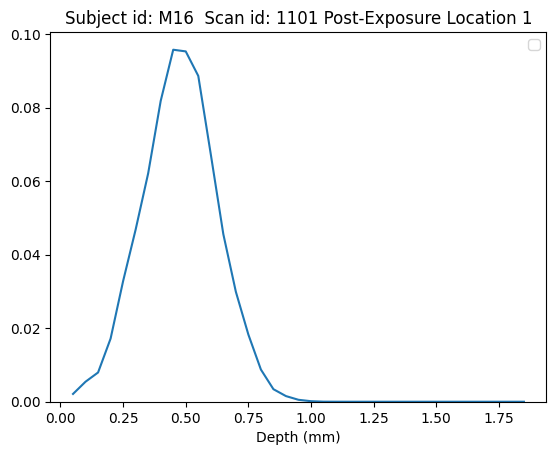

1101 1 False 0.0957575 True 1


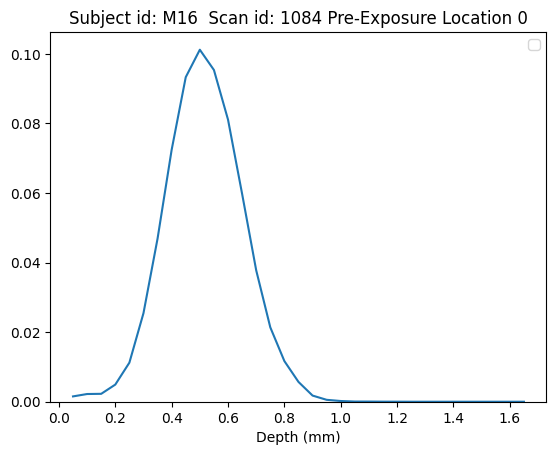

1084 0 False 0.1012 False 0


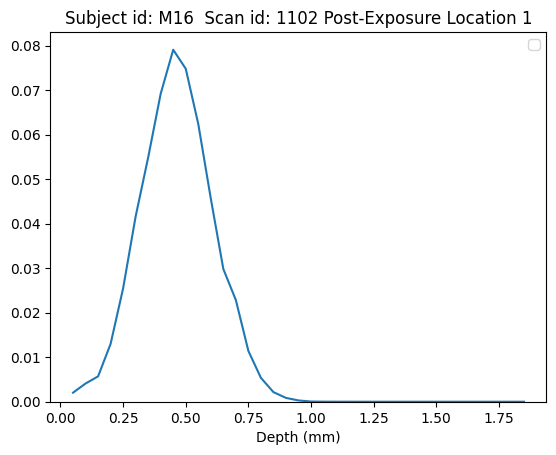

1102 1 False 0.0791159 True 1


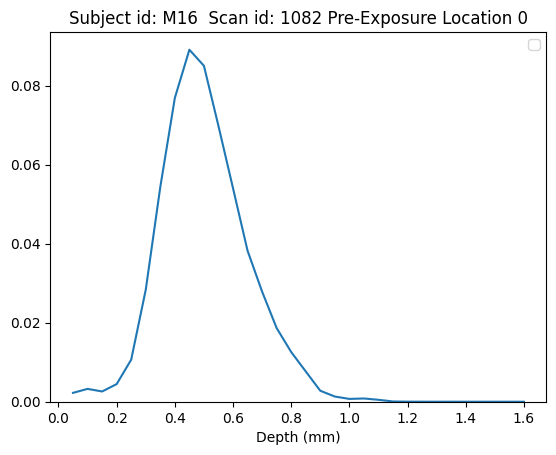

1082 0 False 0.089099 False 0


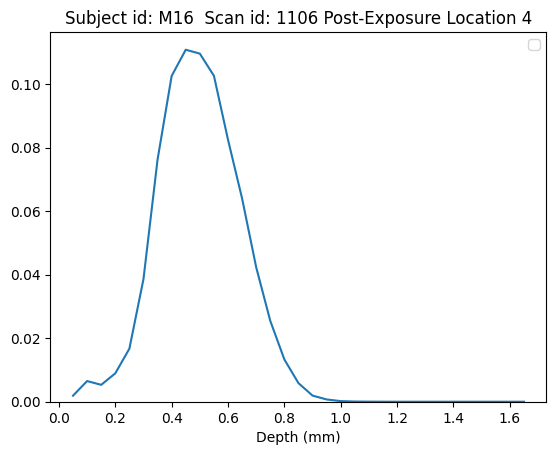

1106 4 False 0.110852 True 4


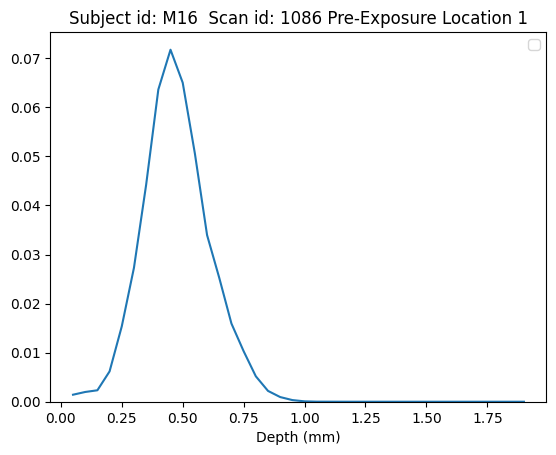

1086 1 False 0.0717388 False 1


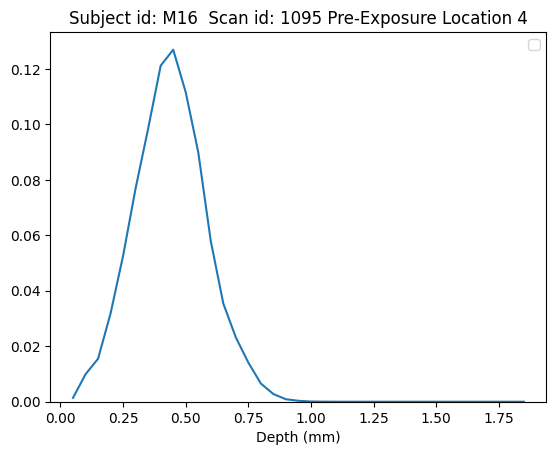

1095 4 False 0.126914 False 4


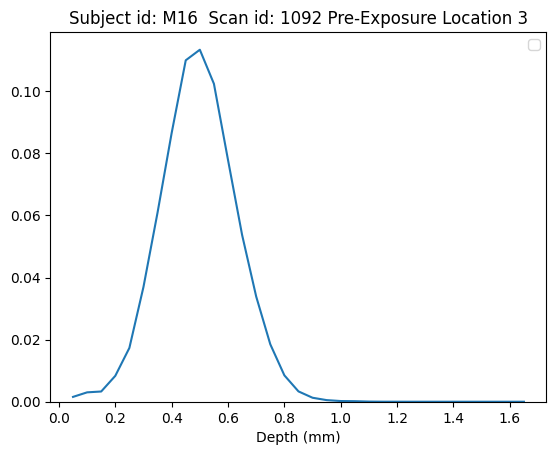

1092 3 False 0.113365 False 3


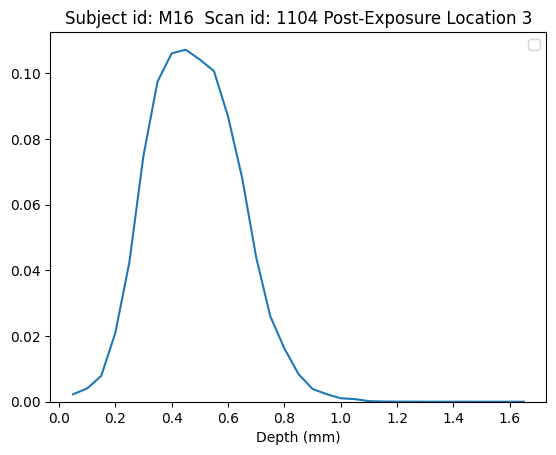

1104 3 False 0.107174 True 3


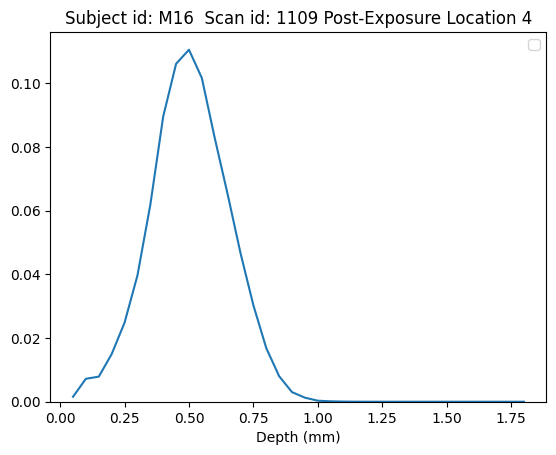

1109 4 False 0.110483 True 4


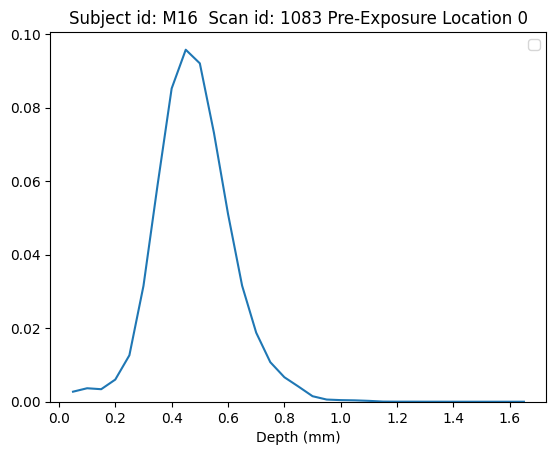

1083 0 False 0.0957408 False 0


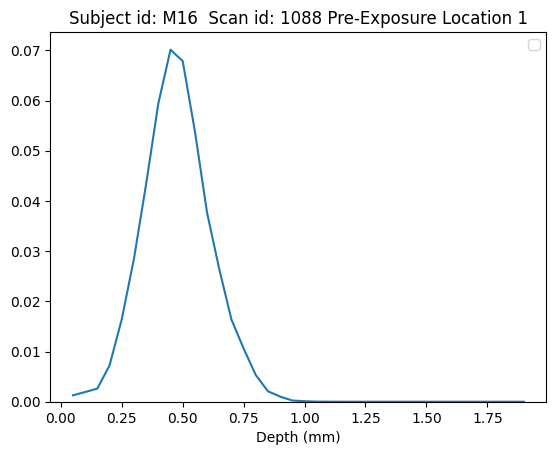

1088 1 False 0.0701262 False 1


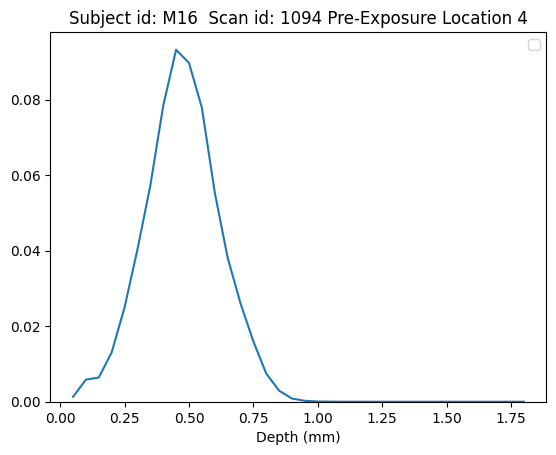

1094 4 False 0.0931892 False 4


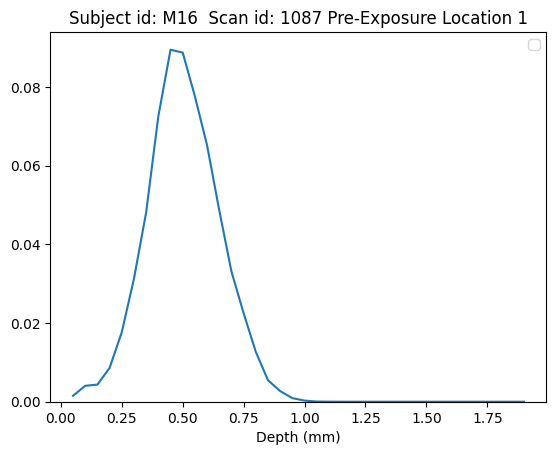

1087 1 False 0.0894417 False 1


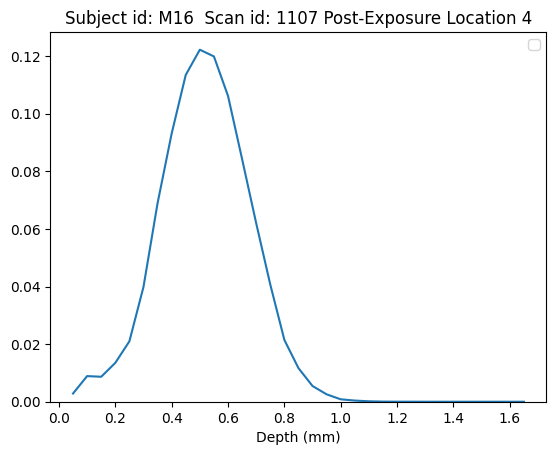

1107 4 False 0.122219 True 4


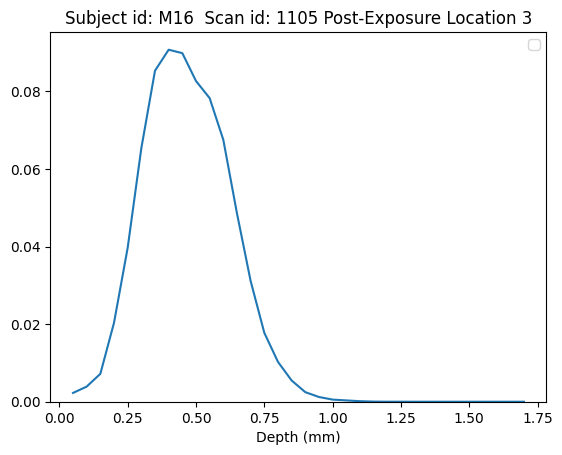

1105 3 False 0.0907142 True 3


In [1]:
import data_read
import importlib
import matplotlib.pyplot as plt
x_vals = []
y_vals = []
colors = []

importlib.reload(data_read)

# Example for Vivosight and Bloodflow Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# For subject ___ - read "bloodflow" data
subject_id = "M16"
subject_data = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")


# Look at initial visit information
visit_data = subject_data.visit
for blood_data in visit_data.blood_flow:
    blood_data.plot_vascular_density(subject_data.subject_id)
    blood_data.get_max_density()
    print(blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

# If the subject had a return visit Look at that too
if subject_data.return_visit is not None:
    visit_data = subject_data.return_visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            blood_data.plot_vascular_density(subject_data.subject_id)
            blood_data.get_max_density()
            print(blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x3008ce5a0>, <data_types.BloodFlow object at 0x3004db6e0>, <data_types.BloodFlow object at 0x3005b48f0>, <data_types.BloodFlow object at 0x3008268a0>, <data_types.BloodFlow object at 0x3007acec0>, <data_types.BloodFlow object at 0x30091bc50>, <data_types.BloodFlow object at 0x30085c200>, <data_types.BloodFlow object at 0x3004d17f0>, <data_types.BloodFlow object at 0x300824800>, <data_types.BloodFlow object at 0x30091bb90>, <data_types.BloodFlow object at 0x3009349e0>, <data_types.BloodFlow object at 0x300934bf0>, <data_types.BloodFlow object at 0x300935400>, <data_types.BloodFlow object at 0x300935640>, <data_types.BloodFlow object at 0x3008ce330>, <data_types.BloodFlow object at 0x3009361b0>, <data_types.BloodFlow object at 0x3009360f0>, <data_types.BloodFlow object at 0x300935be0>, <data_types.BloodFlow object at 0x3006a6b40>, <data_types.BloodFlow object at 0x300936810>, <data_types.BloodFlow object at 0x300936c60>, <

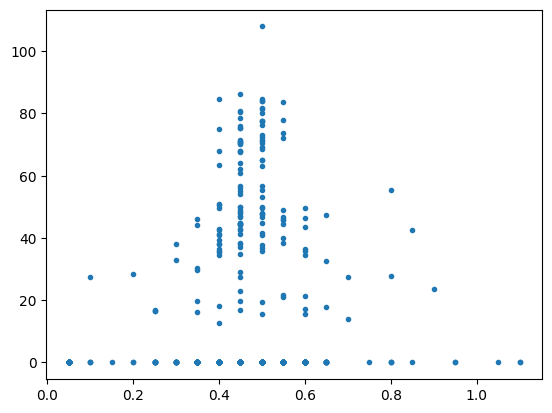

In [2]:
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Store all the data in a dictionary by subject_id
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")


max_density = []
depth_at_max_density = []
# Print out data like above but include subject id
for subject_id, subject_data in subjects.items():
    
    # Look at initial visit information
    visit_data = subject_data.visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            max_density.append(blood_data.get_max_density())
            depth_at_max_density.append(blood_data.get_depth_max_diameter())


    # If the subject had a return visit Look at that too
    if subject_data.return_visit is not None:
        visit_data = subject_data.return_visit
        if visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                max_density.append(blood_data.get_max_diameter())
                depth_at_max_density.append(blood_data.get_depth_max_diameter())

plt.plot(depth_at_max_density,max_density,'.')
plt.show()

In [3]:
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Store all the data in a dictionary by subject_id
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")

# Print out data like above but include subject id
for subject_id, subject_data in subjects.items():
    
    # Look at initial visit information
    visit_data = subject_data.visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            # blood_data.plot_vascular_density(subject_data.subject_id)
            blood_data.get_max_density()
            print(subject_id,"initial",blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

    # If the subject had a return visit Look at that too
    if subject_data.return_visit is not None:
        visit_data = subject_data.return_visit
        if visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                # blood_data.plot_vascular_density(subject_data.subject_id)
                blood_data.get_max_density()
                print(subject_id,"return",blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x300a68e60>, <data_types.BloodFlow object at 0x300a6bd40>, <data_types.BloodFlow object at 0x300a69430>, <data_types.BloodFlow object at 0x300a8ffb0>, <data_types.BloodFlow object at 0x300a8c590>, <data_types.BloodFlow object at 0x300a8f080>, <data_types.BloodFlow object at 0x300a8e1b0>, <data_types.BloodFlow object at 0x300a8dd60>, <data_types.BloodFlow object at 0x300a8ef00>, <data_types.BloodFlow object at 0x300a8c7a0>, <data_types.BloodFlow object at 0x300b0a8a0>, <data_types.BloodFlow object at 0x300a8fb90>, <data_types.BloodFlow object at 0x300a8e960>, <data_types.BloodFlow object at 0x300a8e0f0>, <data_types.BloodFlow object at 0x3009f1c40>, <data_types.BloodFlow object at 0x3009f00b0>, <data_types.BloodFlow object at 0x300a694c0>, <data_types.BloodFlow object at 0x3009f15e0>, <data_types.BloodFlow object at 0x3009f1100>, <data_types.BloodFlow object at 0x3009f2390>, <data_types.BloodFlow object at 0x3009f1a60>, <

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x3004d0b00>, <data_types.BloodFlow object at 0x30062ee70>, <data_types.BloodFlow object at 0x30062e870>, <data_types.BloodFlow object at 0x3005b7d10>, <data_types.BloodFlow object at 0x3005b5010>, <data_types.BloodFlow object at 0x3005b6de0>, <data_types.BloodFlow object at 0x3005b5d30>, <data_types.BloodFlow object at 0x3005b6330>, <data_types.BloodFlow object at 0x3005b6f60>, <data_types.BloodFlow object at 0x3005b4080>, <data_types.BloodFlow object at 0x3005b4e00>, <data_types.BloodFlow object at 0x300467920>, <data_types.BloodFlow object at 0x30097b0e0>, <data_types.BloodFlow object at 0x300978860>, <data_types.BloodFlow object at 0x3009789e0>, <data_types.BloodFlow object at 0x3006a5190>, <data_types.BloodFlow object at 0x3009f3830>, <data_types.BloodFlow object at 0x30055af90>, <data_types.BloodFlow object at 0x3008f23f0>, <data_types.BloodFlow object at 0x3008f26c0>, <data_types.BloodFlow object at 0x30097aa20>, <

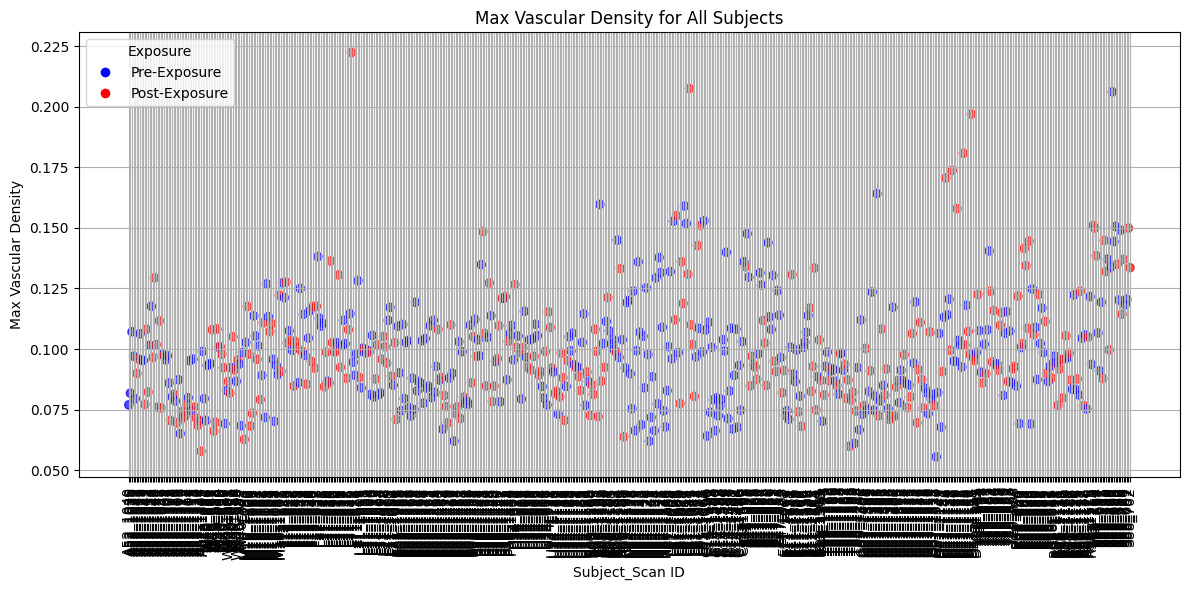

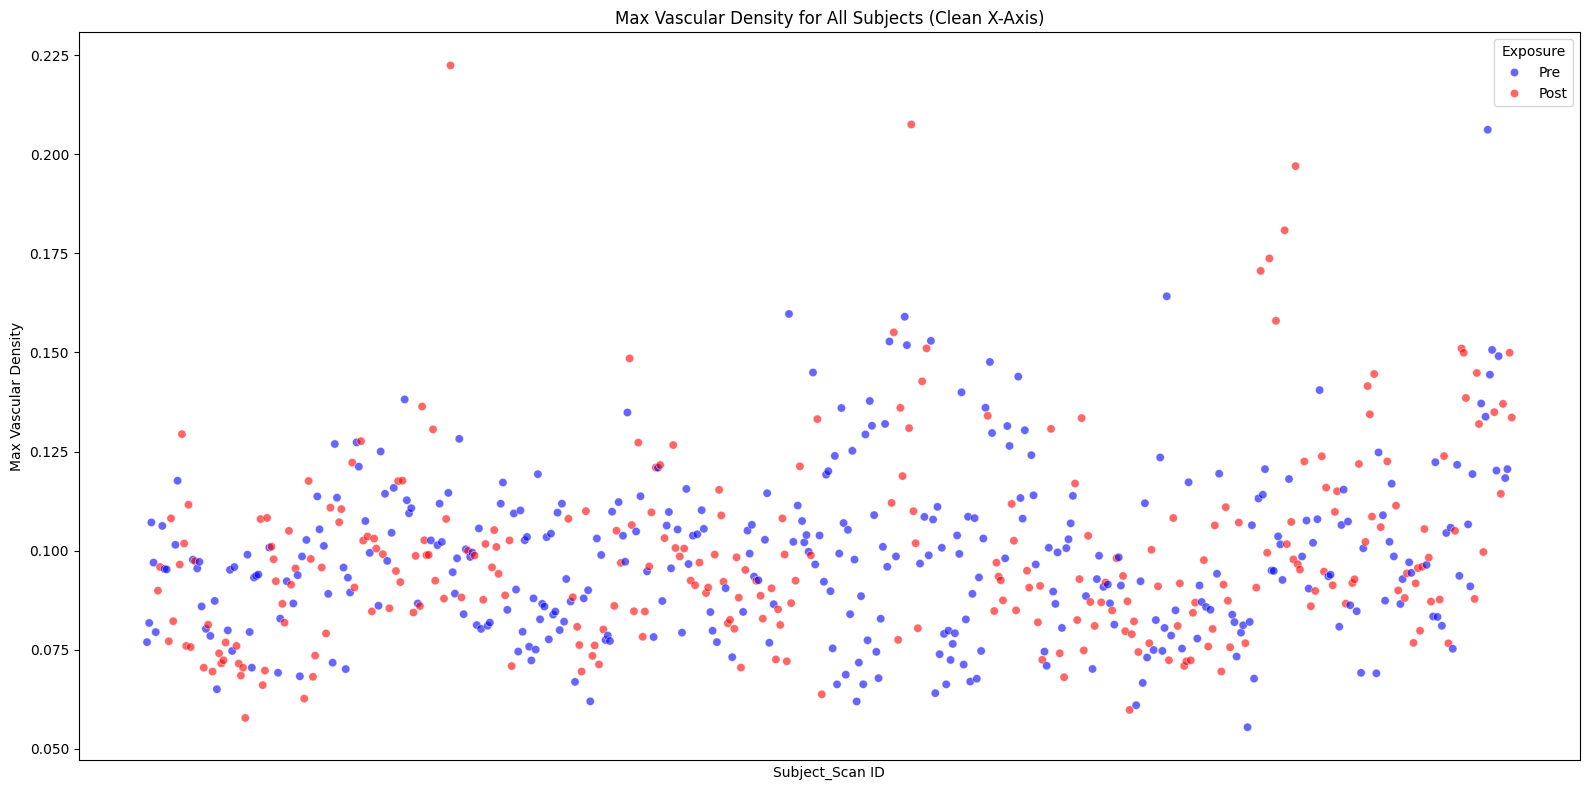

/var/folders/29/xjmbysxn6q37y4tr4d2h8hn00000gn/T/ipykernel_42484/1226928289.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exposure", y="Max Vascular Density", data=df, palette={"Pre": "blue", "Post": "red"})


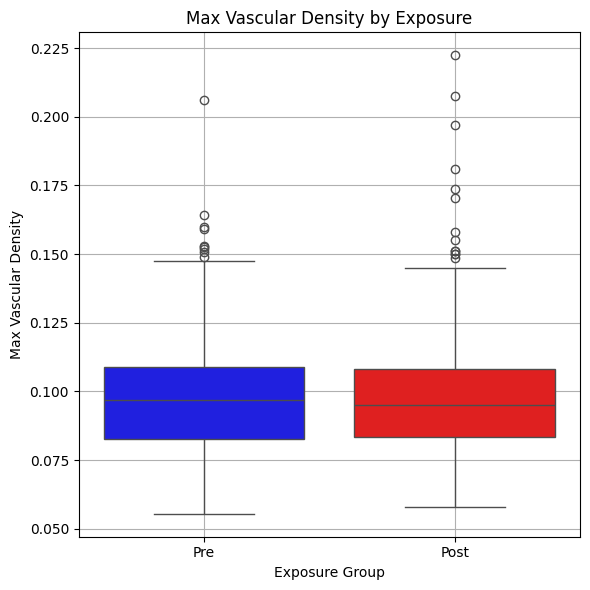

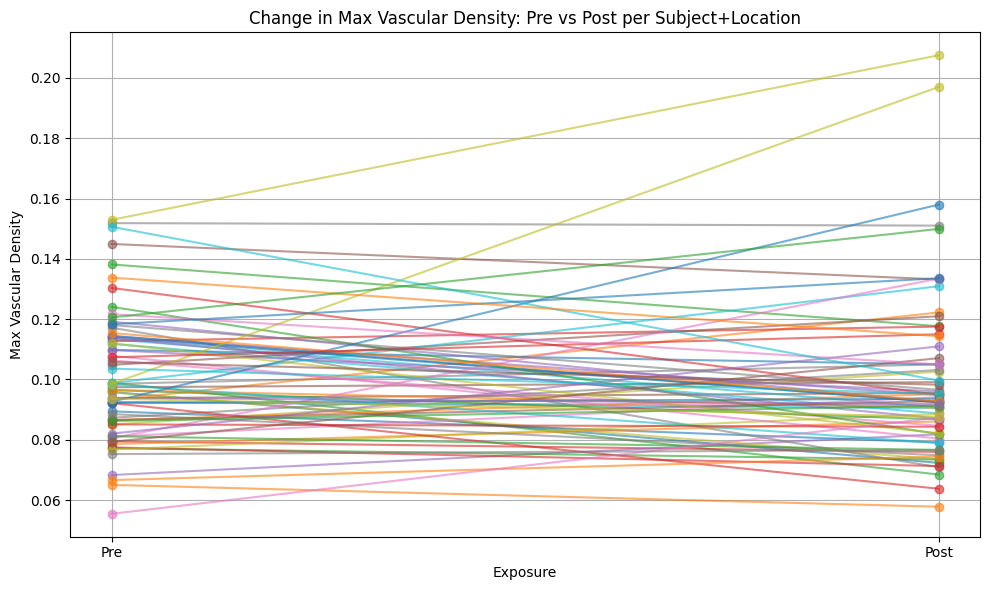

In [4]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Get all subject IDs
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Process and store all subject data
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

# Initialize lists to store data
scan_labels = []
densities = []
exposures = []
locations = []
subject_ids_list = []
pre_post_dict = {}  

# Extract and print blood flow data
for subject_id, subject_data in subjects.items():
    for visit_type, visit_data in zip(["initial", "return"], [subject_data.visit, subject_data.return_visit]):
        if visit_data is not None and visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                blood_data.get_max_density()

                print(subject_id, visit_type, blood_data.scan_id, blood_data.location,
                      blood_data.return_visit, blood_data.max_density, blood_data.exposed)

                label = f"{subject_id}_{blood_data.scan_id}"
                scan_labels.append(label)
                densities.append(blood_data.max_density)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

                # Collect pre/post for paired plotting
                key = f"{subject_id}_{blood_data.location}"
                if key not in pre_post_dict:
                    pre_post_dict[key] = {'Pre': None, 'Post': None}
                if blood_data.exposed:
                    pre_post_dict[key]['Post'] = blood_data.max_density
                else:
                    pre_post_dict[key]['Pre'] = blood_data.max_density

# Convert to DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vascular Density": densities,
    "Exposure": exposures,
    "Location": locations,
})

# Scatterplot with full x-axis labels
plt.figure(figsize=(12, 6))
colors = ['red' if exp == 'Post' else 'blue' for exp in df["Exposure"]]
plt.scatter(range(len(df)), df["Max Vascular Density"], c=colors, alpha=0.7)
plt.xticks(ticks=range(len(df)), labels=df["Scan Label"], rotation=90)
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vascular Density")
plt.title("Max Vascular Density for All Subjects")
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', label='Pre-Exposure', markerfacecolor='blue', markersize=8),
    mlines.Line2D([0], [0], marker='o', color='w', label='Post-Exposure', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title="Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot with clean x-axis (no clutter)
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='Scan Label',
    y='Max Vascular Density',
    hue='Exposure',
    palette={'Pre': 'blue', 'Post': 'red'},
    alpha=0.6
)
plt.xticks([], [])  
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vascular Density")
plt.title("Max Vascular Density for All Subjects (Clean X-Axis)")
plt.legend(title='Exposure')
plt.tight_layout()
plt.show()

# Boxplot - Pre vs Post Exposure
plt.figure(figsize=(6, 6))
sns.boxplot(x="Exposure", y="Max Vascular Density", data=df, palette={"Pre": "blue", "Post": "red"})
plt.title("Max Vascular Density by Exposure")
plt.xlabel("Exposure Group")
plt.ylabel("Max Vascular Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot showing pre vs post for each subject-location pair
plt.figure(figsize=(10, 6))
for key, pair in pre_post_dict.items():
    if pair['Pre'] is not None and pair['Post'] is not None:
        plt.plot(['Pre', 'Post'], [pair['Pre'], pair['Post']], marker='o', label=key, alpha=0.6)
plt.xlabel("Exposure")
plt.ylabel("Max Vascular Density")
plt.title("Change in Max Vascular Density: Pre vs Post per Subject+Location")
plt.grid(True)
plt.tight_layout()
plt.show()


data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x300b59730>, <data_types.BloodFlow object at 0x3003d3f80>, <data_types.BloodFlow object at 0x300b5bd70>, <data_types.BloodFlow object at 0x30086ca70>, <data_types.BloodFlow object at 0x300ae7e90>, <data_types.BloodFlow object at 0x300ae5610>, <data_types.BloodFlow object at 0x300ae4500>, <data_types.BloodFlow object at 0x300ae4110>, <data_types.BloodFlow object at 0x300ae5850>, <data_types.BloodFlow object at 0x300ae5fa0>, <data_types.BloodFlow object at 0x300ae7b00>, <data_types.BloodFlow object at 0x300ae50d0>, <data_types.BloodFlow object at 0x300edfd70>, <data_types.BloodFlow object at 0x30124af00>, <data_types.BloodFlow object at 0x300ab2a20>, <data_types.BloodFlow object at 0x300ab37a0>, <data_types.BloodFlow object at 0x1373c38f0>, <data_types.BloodFlow object at 0x300ab0bf0>, <data_types.BloodFlow object at 0x300ab2990>, <data_types.BloodFlow object at 0x300ab2510>, <data_types.BloodFlow object at 0x300ab3170>, <

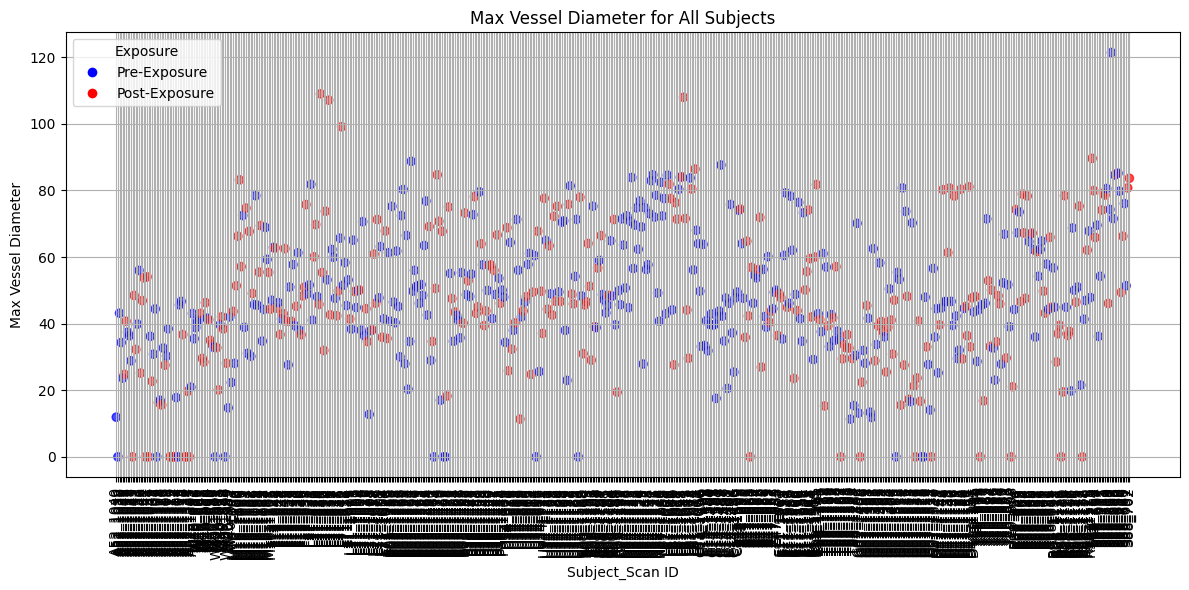

ValueError: Could not interpret value `blood_data.depth` for `x`. An entry with this name does not appear in `data`.

<Figure size 1600x800 with 0 Axes>

In [5]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Get all subject IDs
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Process and store all subject data
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

# Initialize lists to store data
scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []
pre_post_dict = {}  # For optional pre-post line plot

# Extract and print blood flow data
for subject_id, subject_data in subjects.items():
    for visit_type, visit_data in zip(["initial", "return"], [subject_data.visit, subject_data.return_visit]):
        if visit_data is not None and visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                blood_data.get_max_diameter()

                print(subject_id, visit_type, blood_data.scan_id, blood_data.location,
                      blood_data.return_visit, blood_data.max_diameter, blood_data.exposed)

                label = f"{subject_id}_{blood_data.scan_id}"
                scan_labels.append(label)
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

                # Collect pre/post for paired plotting
                key = f"{subject_id}_{blood_data.location}"
                if key not in pre_post_dict:
                    pre_post_dict[key] = {'Pre': None, 'Post': None}
                if blood_data.exposed:
                    pre_post_dict[key]['Post'] = blood_data.max_diameter
                else:
                    pre_post_dict[key]['Pre'] = blood_data.max_diameter

# Step 5: Convert to DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Scatterplot with full x-axis labels
plt.figure(figsize=(12, 6))
colors = ['red' if exp == 'Post' else 'blue' for exp in df["Exposure"]]
plt.scatter(range(len(df)), df["Max Vessel Diameter"], c=colors, alpha=0.7)
plt.xticks(ticks=range(len(df)), labels=df["Scan Label"], rotation=90)
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vessel Diameter")
plt.title("Max Vessel Diameter for All Subjects")
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', label='Pre-Exposure', markerfacecolor='blue', markersize=8),
    mlines.Line2D([0], [0], marker='o', color='w', label='Post-Exposure', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title="Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot with clean x-axis (no clutter)
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='blood_data.depth',
    y='Max Vessel Diameter',
    hue='Exposure',
    palette={'Pre': 'blue', 'Post': 'red'},
    alpha=0.6
)
plt.xticks([], [])  
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vessel Diameter")
plt.title("Max Vessel Diameter for All Subjects (Clean X-Axis)")
plt.legend(title='Exposure')
plt.tight_layout()
plt.show()

# Boxplot - Pre vs Post Exposure
plt.figure(figsize=(6, 6))
sns.boxplot(x="Exposure", y="Max Vessel Diameter", data=df, palette={"Pre": "blue", "Post": "red"})
plt.title("Max Vessel Diameter by Exposure")
plt.xlabel("Exposure Group")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot showing pre vs post for each subject-location pair
plt.figure(figsize=(10, 6))
for key, pair in pre_post_dict.items():
    if pair['Pre'] is not None and pair['Post'] is not None:
        plt.plot(['Pre', 'Post'], [pair['Pre'], pair['Post']], marker='o', label=key, alpha=0.6)
plt.xlabel("Exposure")
plt.ylabel("Max Vessel Diameter")
plt.title("Change in Max Vessel Diameter: Pre vs Post per Subject+Location")
plt.grid(True)
plt.tight_layout()
plt.show()

#Histogram of Max Vessel diameter

# Combined histogram
plt.figure(figsize=(8, 6))
sns.histplot(df["Max Vessel Diameter"], bins=20, kde=True, color='gray')
plt.title("Histogram of Max Vessel Diameter (All Data)")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Separated histograms by Exposure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Max Vessel Diameter", hue="Exposure", bins=20, kde=True,
             palette={"Pre": "blue", "Post": "red"}, element="step", stat="count", common_norm=False)
plt.title("Histogram of Max Vessel Diameter by Exposure")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x300801850>, <data_types.BloodFlow object at 0x3005fb830>, <data_types.BloodFlow object at 0x3008017c0>, <data_types.BloodFlow object at 0x300deb3e0>, <data_types.BloodFlow object at 0x300deb320>, <data_types.BloodFlow object at 0x300de93d0>, <data_types.BloodFlow object at 0x300dea420>, <data_types.BloodFlow object at 0x300debda0>, <data_types.BloodFlow object at 0x300de96a0>, <data_types.BloodFlow object at 0x300dea150>, <data_types.BloodFlow object at 0x300de8dd0>, <data_types.BloodFlow object at 0x300de8050>, <data_types.BloodFlow object at 0x300de82c0>, <data_types.BloodFlow object at 0x300deb6b0>, <data_types.BloodFlow object at 0x300deb3b0>, <data_types.BloodFlow object at 0x30119dd90>, <data_types.BloodFlow object at 0x177bb1700>, <data_types.BloodFlow object at 0x30119e630>, <data_types.BloodFlow object at 0x30119fb90>, <data_types.BloodFlow object at 0x30119e090>, <data_types.BloodFlow object at 0x30119e360>, <

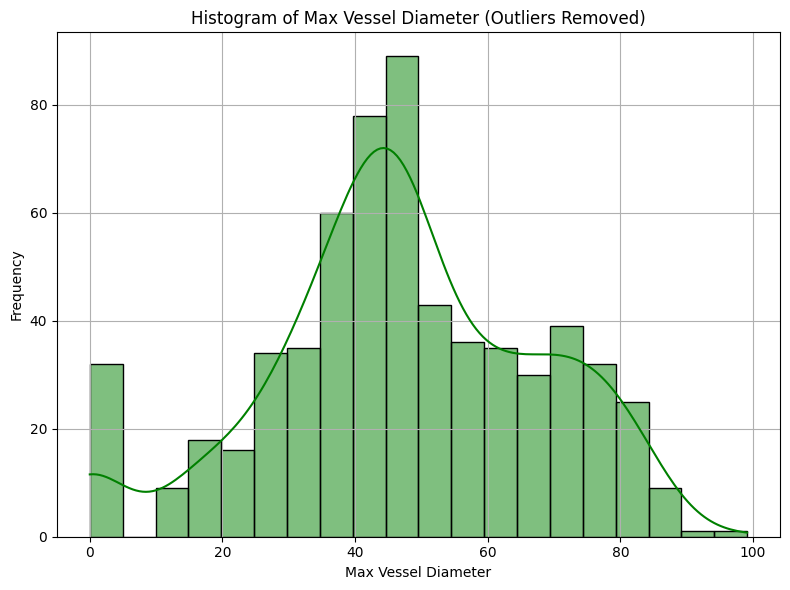

In [6]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Step 1: Collect data
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
subjects = {}

scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")
    subjects[subject_id] = subject

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                scan_labels.append(f"{subject_id}_{blood_data.scan_id}")
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)


# Step 2: Create DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Step 3: Identify and remove outliers
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Max Vessel Diameter"] < lower_bound) | (df["Max Vessel Diameter"] > upper_bound)]

print("Outliers detected:")
for _, row in outliers.iterrows():
    print(
        f"Subject: {row['Subject']}, Scan ID: {row['Scan Label'].split('_')[1]}, "
        f"Location: {row['Location']}, Return Visit: {'Yes' if '_2' in row['Scan Label'] else 'No'}, "
        f"Max Diameter: {row['Max Vessel Diameter']:.2f}, Exposure: {row['Exposure']}"
    )

# Step 4: Filter out outliers
df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 5: Plot histogram without outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_clean["Max Vessel Diameter"], bins=20, kde=True, color='green')
plt.title("Histogram of Max Vessel Diameter (Outliers Removed)")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
#normality test (shows data is NOT a normal distribution)
from scipy.stats import shapiro

stat, p = shapiro(df_clean["Max Vessel Diameter"])
print(f"Shapiro-Wilk p-value = {p}")

Shapiro-Wilk p-value = 2.002201659806376e-08


The distributions of max vessel diameter in the full and cleaned datasets are not significantly different. (Mann Whitney test) not normally distributed data

In [8]:
import data_read
import pandas as pd
import numpy as np

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Collect data
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
subjects = {}

scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")
    subjects[subject_id] = subject

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                scan_labels.append(f"{subject_id}_{blood_data.scan_id}")
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

# Create full DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Remove outliers using IQR
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

print("Shapiro-Wilk Test (Original):", shapiro(df["Max Vessel Diameter"]))
print("Shapiro-Wilk Test (Cleaned):", shapiro(df_clean["Max Vessel Diameter"]))

levene_stat, levene_p = levene(df["Max Vessel Diameter"], df_clean["Max Vessel Diameter"])
print(f"Levene's test p-value: {levene_p}")

u_stat, u_p = mannwhitneyu(df["Max Vessel Diameter"], df_clean["Max Vessel Diameter"], alternative='two-sided')
print(f"Mann-Whitney U test p-value: {u_p}")

from scipy.stats import shapiro, mannwhitneyu

# Split the cleaned data into Pre and Post groups
pre = df_clean[df_clean["Exposure"] == "Pre"]["Max Vessel Diameter"]
post = df_clean[df_clean["Exposure"] == "Post"]["Max Vessel Diameter"]

# Shapiro-Wilk Normality Test (again, for both groups)
print("Shapiro-Wilk Test - Pre Exposure:", shapiro(pre))
print("Shapiro-Wilk Test - Post Exposure:", shapiro(post))

# Mann-Whitney U Test (non-parametric comparison)
stat, p = mannwhitneyu(pre, post, alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {p}")


data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x3003aa090>, <data_types.BloodFlow object at 0x3003abbf0>, <data_types.BloodFlow object at 0x3006319d0>, <data_types.BloodFlow object at 0x300632630>, <data_types.BloodFlow object at 0x300630590>, <data_types.BloodFlow object at 0x300630200>, <data_types.BloodFlow object at 0x300630110>, <data_types.BloodFlow object at 0x300631f40>, <data_types.BloodFlow object at 0x300632540>, <data_types.BloodFlow object at 0x300633530>, <data_types.BloodFlow object at 0x3009e2540>, <data_types.BloodFlow object at 0x3009e0a70>, <data_types.BloodFlow object at 0x3009e00b0>, <data_types.BloodFlow object at 0x3009e0800>, <data_types.BloodFlow object at 0x3014665a0>, <data_types.BloodFlow object at 0x3007c20f0>, <data_types.BloodFlow object at 0x3007c2b10>, <data_types.BloodFlow object at 0x30283b2f0>, <data_types.BloodFlow object at 0x30283bd70>, <data_types.BloodFlow object at 0x3028382f0>, <data_types.BloodFlow object at 0x3028399d0>, <

The Shapiro-Wilk Test results show that both the original and cleaned data, as well as the pre and post-exposure data, are not normally distributed.

Levene's Test indicates that the variances of the groups are equal.

The Mann-whitney U Test shows that there is no significant difference between the pre and post-exposure data - the data distributions for these two groups are not significantly different.

/var/folders/29/xjmbysxn6q37y4tr4d2h8hn00000gn/T/ipykernel_42484/1684740010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x="Exposure", y="Max Vessel Diameter", palette={"Pre": "blue", "Post": "red"})


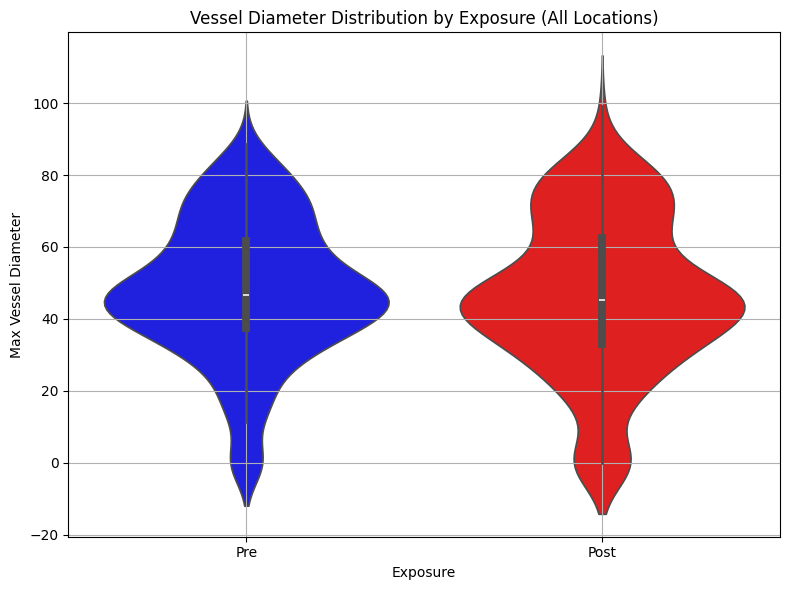

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_clean, x="Exposure", y="Max Vessel Diameter", palette={"Pre": "blue", "Post": "red"})
plt.title("Vessel Diameter Distribution by Exposure (All Locations)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import wilcoxon

# 1. Create a pivoted table with paired Pre/Post by Subject+Location
paired_data = df_clean.pivot_table(
    index=["Subject", "Location"],
    columns="Exposure",
    values="Max Vessel Diameter"
).dropna()

# 2. Run Wilcoxon signed-rank test (non-parametric paired test)
stat, p = wilcoxon(paired_data["Pre"], paired_data["Post"])
print(f"Wilcoxon signed-rank test p-value (paired Pre vs Post): {p}")

Wilcoxon signed-rank test p-value (paired Pre vs Post): 0.5435324511073372


Indexing by subject and location and columns are split into "pre" and "post" based on the Exposure column.

Values are the "Max Vessel Diameter" for each subject-location pair

non-parametric test used to compare two related samples - pre and post exposure measurements for the same subject-location pair

p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference between the pre-exposure and post-exposure max vessel diameter values for the subject-location pairs. (for all data)

** need to do for return participants 

In [12]:
from scipy.stats import kruskal

groups = [group["Max Vessel Diameter"].values for _, group in df_clean.groupby("Location")]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test across locations (all data): p = {p}")

Kruskal-Wallis test across locations (all data): p = 0.016876497327329428


kruskal-wallis test compares the distributions of Max Vessel Diameter across multiple groups (locations)

p value of 0.01687.. is less than 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the Max Vessel Diameter across the different locations

In [13]:
# Count valid pairs (same subject and location, both pre and post available)
paired_data = df_clean.pivot_table(
    index=["Subject", "Location"],
    columns="Exposure",
    values="Max Vessel Diameter"
).dropna()

print(f" Number of valid paired Pre/Post measurements: {len(paired_data)}")

 Number of valid paired Pre/Post measurements: 73


In [1]:
# comparisons by location and by pre and post data
import data_read
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Step 1: Initialize collection
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Step 2: Use process_subject_vivosight_data to get structured info
for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            # Recalculate min_location_id

            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                # print("check",blood_data.location)

                data["Subject"].append(subject_id)
                data["Scan ID"].append(blood_data.scan_id)
                data["Location ID"].append(blood_data.location)
                data["Exposure"].append("Post" if blood_data.exposed else "Pre")
                data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 5: Run Mann-Whitney U test for Pre vs Post per location
print("Mann-Whitney U Test: Pre vs Post by Location\n")

for loc in [1, 2, 3, 4]:
    pre = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Pre")]["Max Vessel Diameter"]
    post = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Post")]["Max Vessel Diameter"]

    print(f" Location {loc}:")
    print(f"   Pre (n={len(pre)}), Post (n={len(post)})")

    if len(pre) >= 3 and len(post) >= 3:
        stat, p = mannwhitneyu(pre, post, alternative='two-sided')
        sig = " Significant" if p < 0.05 else "Not significant"
        print(f"   Mann-Whitney U p-value = {p:.4f} → {sig}\n")
    else:
        print("    Not enough data to compare\n")

A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1257 1
A52 1256.0 1259 3
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1257 1
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1259 3
data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x138325fa0>, <data_types.BloodFlow object at 0x13925af00>, <data_types.BloodFlow object at 0x13924f950>, <data_types.BloodFlow object at 0x1390d3260>, <data_types.BloodFlow object at 0x13925fcb0>, <data_types.BloodFlow object at 0x1395d7dd0>, <data_types.BloodFlow object at 0x1395d77d0>, <data_types.BloodFlow object at 0x1395d7740>, <data_types.BloodFlow object at 0x1395d7290>, <data_types.BloodFlow object at 0x1395d6c30>, <data_types.BloodFlow object at 0x1395d6e10>, <data_types.BloodFlow object 

UnboundLocalError: cannot access local variable 'before_exposure_data' where it is not associated with a value

Determine whether there are significant changes in the max vessel diameter between pre and post exposure at each location independently.

In [2]:
#checking to see if its actually reading in the location id's
import data_read

vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_ids = data_read.get_all_subject_ids(vivosight_folder)

print(" Locations extracted by subject and scan:")

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

    for visit_type, visit in zip(["initial", "return"], [subject.visit, subject.return_visit]):
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                print(f"  - Scan ID: {blood_data.scan_id} | Mapped Location ID: {blood_data.location} | Exposure: {'Post' if blood_data.exposed else 'Pre'}")

 Locations extracted by subject and scan:
A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1257 1
A52 1256.0 1259 3
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1257 1
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1259 3
data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x1578d1fa0>, <data_types.BloodFlow object at 0x16a0b9070>, <data_types.BloodFlow object at 0x157fbe4b0>, <data_types.BloodFlow object at 0x178b03a10>, <data_types.BloodFlow object at 0x178b03830>, <data_types.BloodFlow object at 0x178b03fb0>, <data_types.BloodFlow object at 0x157ed86b0>, <data_types.BloodFlow object at 0x157edac30>, <data_types.BloodFlow object at 0x178b02b10>, <data_types.BloodFlow object at 0x178b03110>, <data_types.BloodFlow object at 0

UnboundLocalError: cannot access local variable 'before_exposure_data' where it is not associated with a value

8


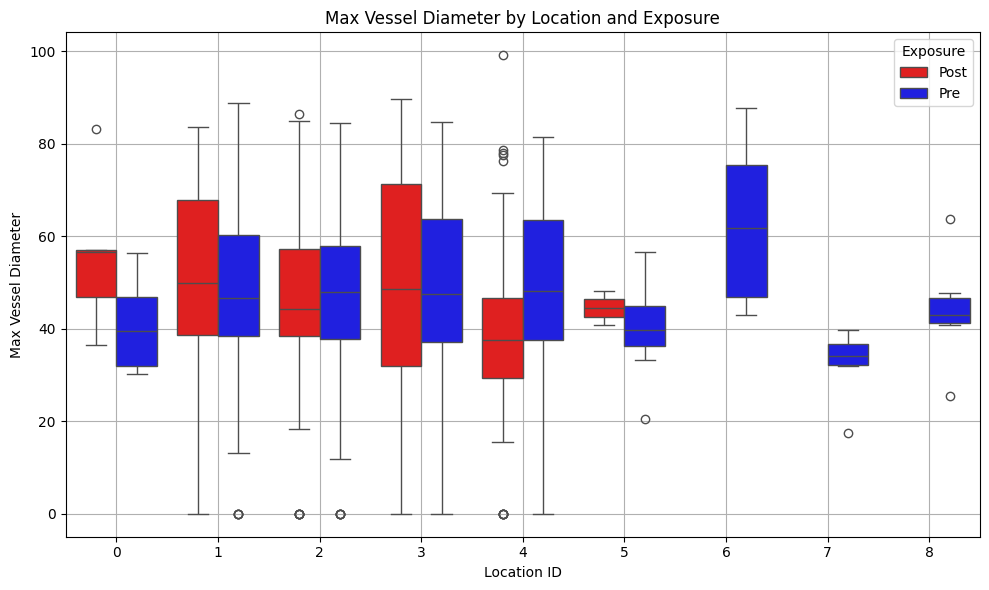

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


print(df_clean["Location ID"].max())

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x="Location ID",
    y="Max Vessel Diameter",
    hue="Exposure",
    palette={"Pre": "blue", "Post": "red"}
)

plt.title("Max Vessel Diameter by Location and Exposure")
plt.xlabel("Location ID")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

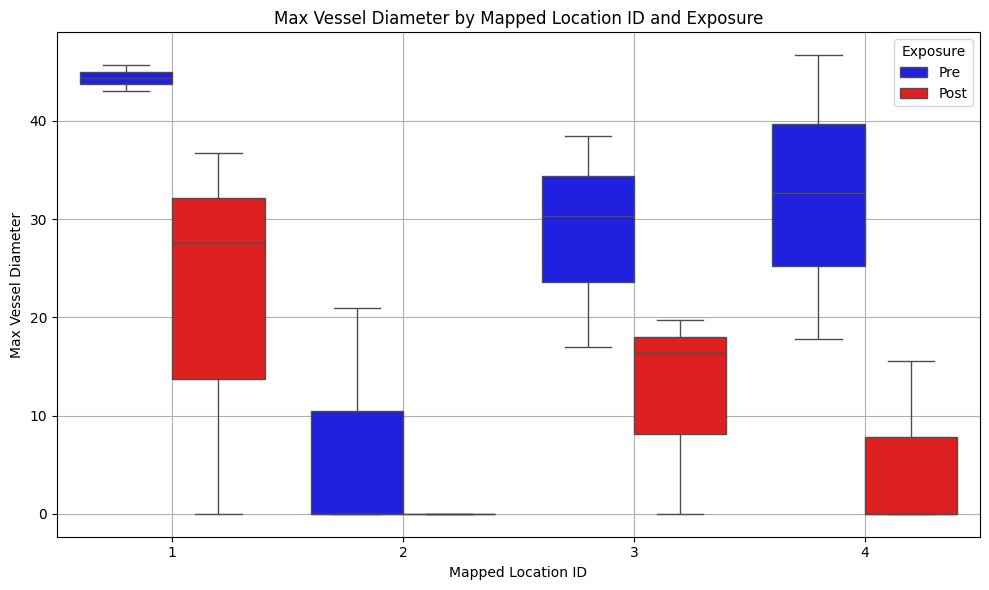

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x="Location ID",
    y="Max Vessel Diameter",
    hue="Exposure",
    palette={"Pre": "blue", "Post": "red"}
)

plt.title("Max Vessel Diameter by Mapped Location ID and Exposure")
plt.xlabel("Mapped Location ID")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x1200ed100>, <data_types.BloodFlow object at 0x120565250>, <data_types.BloodFlow object at 0x11fe31bb0>, <data_types.BloodFlow object at 0x1207ee270>, <data_types.BloodFlow object at 0x120100350>, <data_types.BloodFlow object at 0x120100410>, <data_types.BloodFlow object at 0x1201016a0>, <data_types.BloodFlow object at 0x120103650>, <data_types.BloodFlow object at 0x11fb2b920>, <data_types.BloodFlow object at 0x11c865070>, <data_types.BloodFlow object at 0x11ffb9100>, <data_types.BloodFlow object at 0x11f94ac90>, <data_types.BloodFlow object at 0x11e9726f0>, <data_types.BloodFlow object at 0x11fff45f0>, <data_types.BloodFlow object at 0x11ff4bcb0>, <data_types.BloodFlow object at 0x120565c40>, <data_types.BloodFlow object at 0x11ff6ecf0>, <data_types.BloodFlow object at 0x12063f860>, <data_types.BloodFlow object at 0x12063c320>, <data_types.BloodFlow object at 0x120a27950>, <data_types.BloodFlow object at 0x120a26930>, <

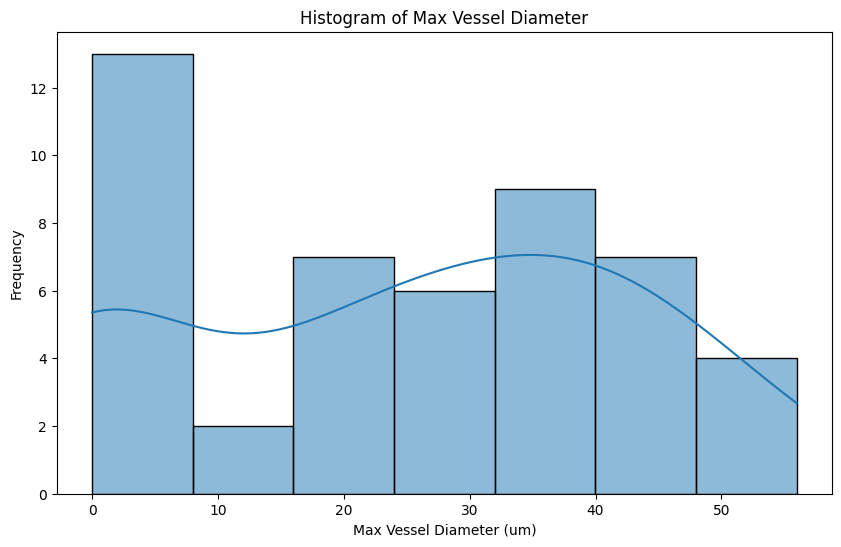

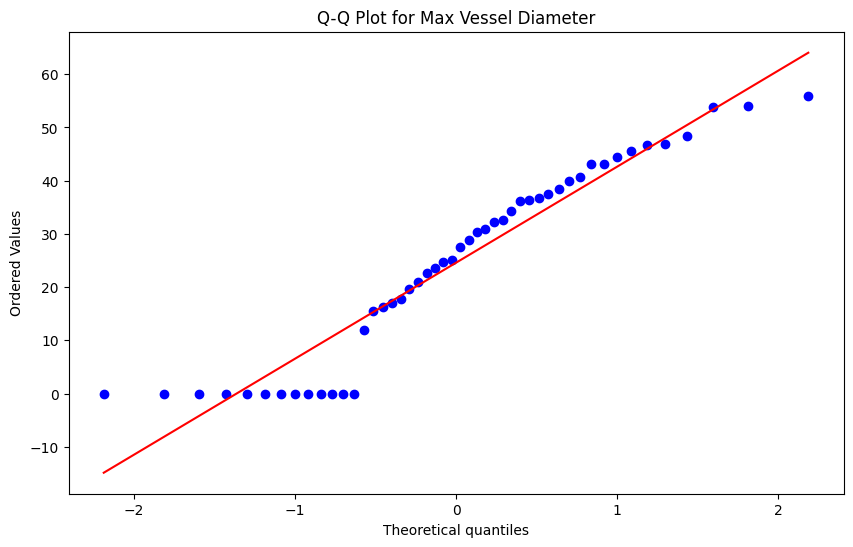

In [ ]:
import data_read
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Initialize collection for subject A52
subject_id = "A52"
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Min Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Process subject data for "A52"
subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")

# Collect the data from both the pre and post exposure visits
for visit in [subject.visit, subject.return_visit]:
    if visit and visit.blood_flow:
        # Recalculate min_location_id
        min_location_id = np.max(visit.locations) - 4

        for blood_data in visit.blood_flow:
            blood_data.get_max_diameter()

            data["Subject"].append(subject_id)
            data["Scan ID"].append(blood_data.scan_id)
            data["Location ID"].append(blood_data.location)
            data["Min Location ID"].append(min_location_id)
            data["Exposure"].append("Post" if blood_data.exposed else "Pre")
            data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 1: Shapiro-Wilk test for normality
stat, p = shapiro(df_clean["Max Vessel Diameter"])
print(f"Shapiro-Wilk test p-value: {p}")
if p < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

# Step 2: Visual Inspection
# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Max Vessel Diameter"], kde=True)
plt.title("Histogram of Max Vessel Diameter")
plt.xlabel("Max Vessel Diameter (um)")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(10, 6))
stats.probplot(df_clean["Max Vessel Diameter"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Max Vessel Diameter")
plt.show()

In [ ]:
import data_read
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Initialize collection
subject_id = "A52_2"
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Min Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Use process_subject_vivosight_data to get structured info for subject "A52"
subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")

# Process both the initial visit and return visit (if available)
for visit in [subject.visit, subject.return_visit]:
    if visit and visit.blood_flow:
        # Recalculate min_location_id
        min_location_id = np.max(visit.locations) - 4

        for blood_data in visit.blood_flow:
            blood_data.get_max_diameter()

            # Append the data to the dictionary
            data["Subject"].append(subject_id)
            data["Scan ID"].append(blood_data.scan_id)
            data["Location ID"].append(blood_data.location)
            data["Min Location ID"].append(min_location_id)
            data["Exposure"].append("Post" if blood_data.exposed else "Pre")
            data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Run Mann-Whitney U test for Pre vs Post per location
print("Mann-Whitney U Test: Pre vs Post by Location for subject A52\n")

for loc in [1, 2, 3, 4]:
    pre = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Pre")]["Max Vessel Diameter"]
    post = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Post")]["Max Vessel Diameter"]

    print(f" Location {loc}:")
    print(f"   Pre (n={len(pre)}), Post (n={len(post)})")

    if len(pre) >= 3 and len(post) >= 3:
        stat, p = mannwhitneyu(pre, post, alternative='two-sided')
        sig = " Significant" if p < 0.05 else "Not significant"
        print(f"   Mann-Whitney U p-value = {p:.4f} → {sig}\n")
    else:
        print("    Not enough data to compare\n")

data/Vivosight_data/A52_2_Results [<data_types.BloodFlow object at 0x11e8c85c0>, <data_types.BloodFlow object at 0x1207ecf20>, <data_types.BloodFlow object at 0x120d71250>, <data_types.BloodFlow object at 0x120d711c0>, <data_types.BloodFlow object at 0x12005a1e0>, <data_types.BloodFlow object at 0x120ebf110>, <data_types.BloodFlow object at 0x120058ec0>, <data_types.BloodFlow object at 0x1200584d0>, <data_types.BloodFlow object at 0x120ebc680>, <data_types.BloodFlow object at 0x120149820>, <data_types.BloodFlow object at 0x1202ad3a0>, <data_types.BloodFlow object at 0x120ef78c0>, <data_types.BloodFlow object at 0x120500380>, <data_types.BloodFlow object at 0x120ef6480>, <data_types.BloodFlow object at 0x12014b410>, <data_types.BloodFlow object at 0x120ef6a50>, <data_types.BloodFlow object at 0x11ffd5d30>, <data_types.BloodFlow object at 0x120ef4050>, <data_types.BloodFlow object at 0x1203fbb00>, <data_types.BloodFlow object at 0x120ef47a0>, <data_types.BloodFlow object at 0x11fe6aea0>,